In [5]:
import pandas as pd
trxn=pd.read_csv("Retail_Data_Transactions.csv")
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [6]:
response=pd.read_csv("Retail_Data_Response.csv")
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [7]:
df=trxn.merge(response,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [8]:
# features

df.head()
df.tail()
df.dtypes
df.shape

(125000, 4)

In [9]:
df.describe() # only works for numerical feature

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [10]:
# calculate null values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [11]:
31/125000 *100  

0.024800000000000003

In [12]:
# remove null values

"""
only 0.02 % values are null .so we can drop those records
if there were more % of null values then we cant drop record
we can go for another methods like fillna 
"""

df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
# change data type 

df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')
df

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\3585251623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_4044\3585251623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype('int64')


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [14]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [15]:
# chech outliers
# z-score

import numpy as np
from scipy import stats

z_scores=np.abs(stats.zscore(df['tran_amount']))
threshold=3
outliers=z_scores>threshold
set(outliers)   # false-> no  outliers


{False}

In [16]:
z_scores=np.abs(stats.zscore(df['response']))
threshold=3;
outliers=z_scores>threshold
set(outliers)

{False}

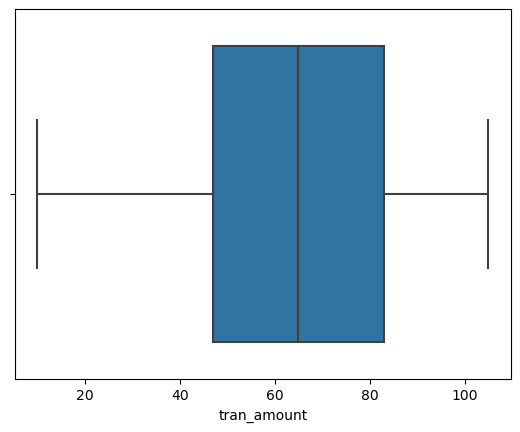

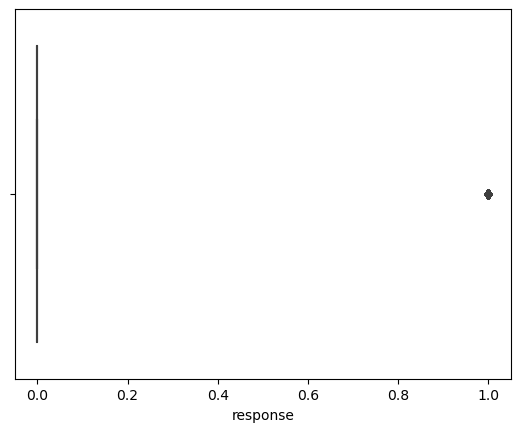

In [17]:
# graphical method to check outliers

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['tran_amount'])
plt.show()

sns.boxplot(x=df['response'])
plt.show()

In [18]:
# creating new columns

df['month']=df['trans_date'].dt.month
df

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\48727711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [19]:
# which 3 months has had higest trans_amount ?

monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [20]:
# customer having highest number of order

cust_count=df['customer_id'].value_counts().reset_index()
cust_count.columns=['customer_id','count']
cust_count

# sort
top_5=cust_count.sort_values(by='count',ascending=False).head(5)
top_5

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

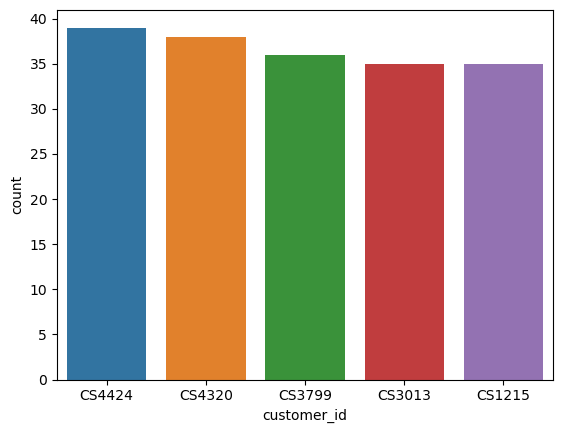

In [21]:
sns.barplot(x='customer_id',y='count',data=top_5)


In [22]:
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

top_5_sales=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

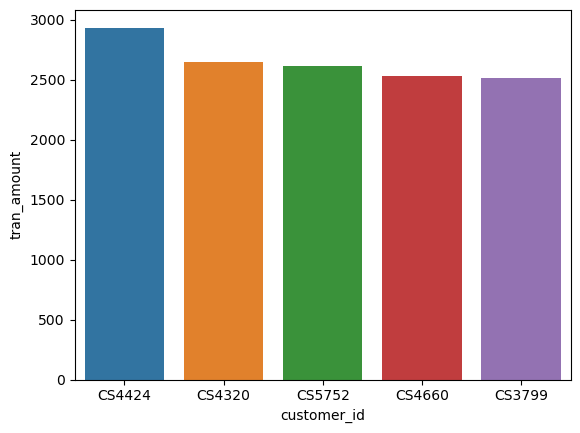

In [23]:
sns.barplot(x="customer_id",y="tran_amount",data=top_5_sales)

In [24]:
# Advanced Analytics
"""
time series analysis
churn analysis
analyzing top customer
"""

'\ntime series analysis\nchurn analysis\nanalyzing top customer\n'

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\548108196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


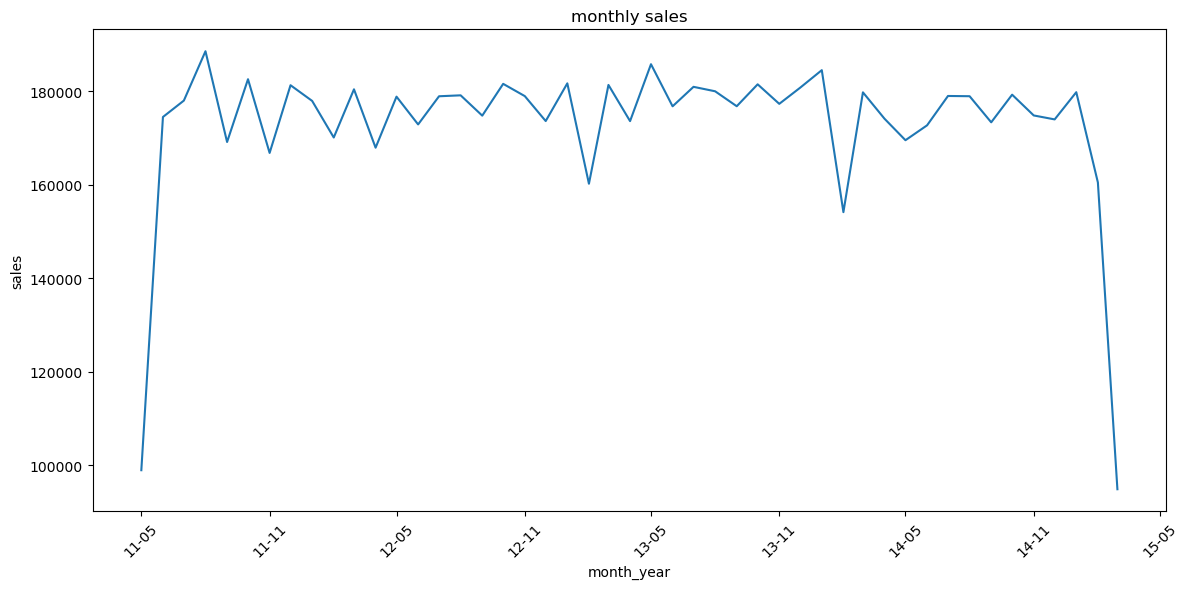

In [25]:
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')

monthly_sales=df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index=monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel("month_year")
plt.ylabel("sales")
plt.title("monthly sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#cohort segmentation

recency=df.groupby('customer_id')['trans_date'].max()
frequency=df.groupby('customer_id')['trans_date'].count()
monetary=df.groupby('customer_id')['tran_amount'].sum()

rfn=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
rfn

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [27]:
# customer analysis

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'

rfn['segment']=rfn.apply(segment_customer,axis=1)
rfn

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: >

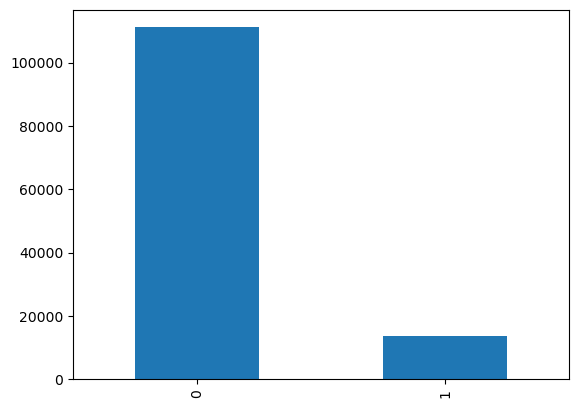

In [28]:
# churn analysis

churn_count=df['response'].value_counts()
churn_count.plot(kind='bar')

<Axes: xlabel='month_year'>

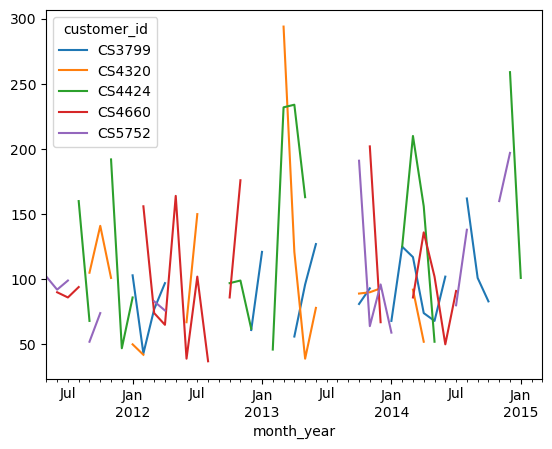

In [29]:
# analyzing top customers

top_5_cust=monetary.sort_values(ascending=False).head(5).index
top_5_customers_df=df[df['customer_id'].isin(top_5_cust)]

top_customer_sales=top_5_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [30]:
df.to_csv('MainData.csv')

In [31]:
rfn.to_csv('addAnlys.csv')